In [4]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [38]:
IMAGE_SIZE_WIDTH = 480
IMAGE_SIZE_HEIGHT = 640
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [9]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "train_images",
    shuffle = True,
    image_size =  (IMAGE_SIZE_WIDTH, IMAGE_SIZE_HEIGHT),
    batch_size = BATCH_SIZE
)

Found 10407 files belonging to 10 classes.


In [11]:
class_names = dataset.class_names
class_names

['bacterial_leaf_blight',
 'bacterial_leaf_streak',
 'bacterial_panicle_blight',
 'blast',
 'brown_spot',
 'dead_heart',
 'downy_mildew',
 'hispa',
 'normal',
 'tungro']

In [14]:
len(dataset)

326

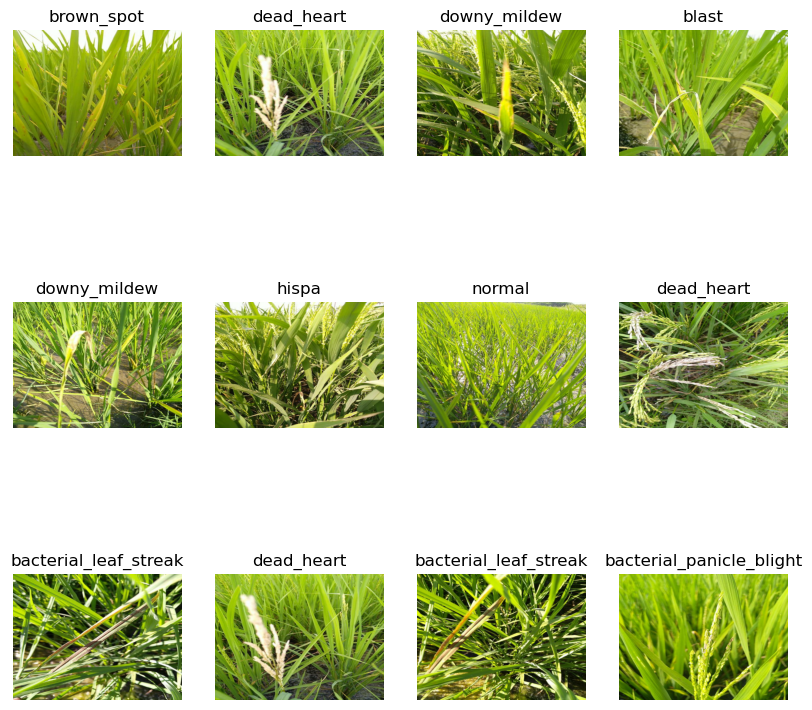

In [37]:
plt.figure(figsize=(10, 10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i+1)
        plt.title(class_names[label_batch[i]])
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.axis("off")


In [41]:
 len(dataset)

326

In [44]:
# 80% ==> training
# 20% ==> 10% validation, 10% test -> to find the accuracy on these 10% then to the launch to outer data

In [45]:
train_size = 0.8
len(dataset)*train_size

260.8

In [46]:
train_ds = dataset.take(260)
len(train_ds)

260

In [47]:
test_ds = dataset.skip(260) #actually not training dataset it is actually further split into validation and test
len(test_ds)

66

In [48]:
val_size = 0.1
len(dataset)*val_size

32.6

In [49]:
val_ds = test_ds.take(32)
len(val_ds)

32

In [50]:
test_ds = test_ds.skip(32)
len(test_ds)

34

In [51]:
def get_dataset_partitions_tf(ds, train_split = 0.8, val_split = 0.1, test_split = 0.1, shuffle = True, shuffle_size = 10000):
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)
    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [52]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [55]:
len(train_ds)


260

In [56]:
len(val_ds)

32

In [57]:
len(test_ds)

34